<a href="https://colab.research.google.com/github/caballeroarturo/B2-Analisis-de-Datos-con-Python-2020/blob/master/Sesion-06/Ejemplo-02/treemaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo 2: Treemaps

### 1. Objetivos:
    - Aprender a generar e interpretar treemaps

---
    
### 2. Desarrollo:

In [4]:
import plotly.express as px
import pandas as pd

Existen dos maneras  de generar treemaps. La primera solamente es una manera de visualizar una jerarquía. Usando `plotly.express` podemos visualizar jerarquías tipo estructura de árbol.

Por ejemplo, tenemos esta estructura:

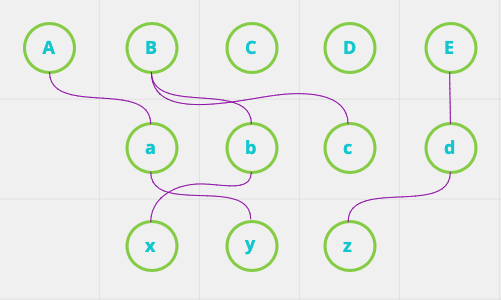

In [8]:
from IPython.display import Image
path = "https://raw.githubusercontent.com/caballeroarturo/B2-Analisis-de-Datos-con-Python-2020/master/Sesion-06"
Image(path + '/Imgs/sesion_6-7.png')

Podemos crear un treemap para visualizarla de otra manera que resulte más clara:

In [9]:
fig = px.treemap(
    names=['A', 'B', 'C', 'D', 'E', 'a', 'b', 'c', 'd', 'x', 'y', 'z'],
    parents=['', '', '', '', '', 'A', 'B', 'B', 'E', 'b', 'a', 'd']
)

fig.show()

La segunda manera de utilizar un treemap consiste en modificar el tamaño de los rectángulos proporcionalmente al tamaño de una variable numérica. Por ejemplo:

In [10]:
path1 = "https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/master/"
df = pd.read_csv(path1 + 'Datasets/athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [14]:
df.shape
df.columns

Index(['name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')

In [15]:
df_grouped = df.groupby('name')[['sex', 'sport']].max()

df_grouped.head()

,sex,sport
name,,
Th Anh,F,Fencing
Th Ngn Thng,F,Gymnastics
Tin Tun,M,Boxing
A Dijiang,M,Basketball
A Lamusi,M,Judo


In [16]:
df_grouped['count'] = 1

In [ ]:
fig = px.treemap(df_grouped, path=['sport', 'sex'], values='count')

fig.show()

In [17]:
df_grouped_2 = df.groupby('name')[['team', 'sport']].max()
df_grouped_2.head()

,team,sport
name,,
Th Anh,Vietnam,Fencing
Th Ngn Thng,Vietnam,Gymnastics
Tin Tun,Vietnam,Boxing
A Dijiang,China,Basketball
A Lamusi,China,Judo


In [18]:
df_grouped_2['count'] = 1

In [19]:
top_5_sports = df_grouped_2['sport'].value_counts().head(5)

In [21]:
top_5_df = df_grouped_2[df_grouped_2['sport'].isin(top_5_sports.index)]

In [22]:
fig = px.treemap(top_5_df, path=['team', 'sport'], values='count')
fig.show()

Algo que es genial de plotly es que hace gráficas interactivas. Dale click a una de las 'hojas' para ver más detalles.